#packages


In [1]:
from tensorflow import keras
from keras.constraints import max_norm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
import seaborn as sns; sns.set()

#downloading and spliting the data

In [2]:
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [3]:
#reshaping data
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train[0]

array([6], dtype=uint8)

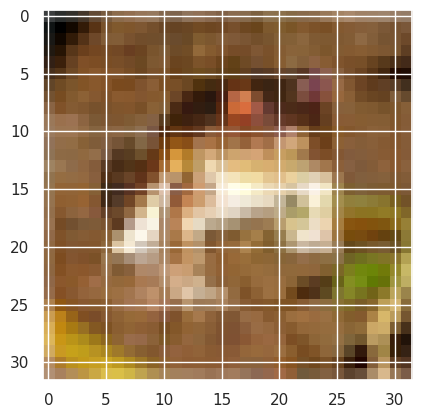

In [5]:

plt.imshow(x_train[0])

In [6]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
x_train = x_train.astype("int32")
x_test = x_test.astype("int32")
x_train = x_train/255
x_test = x_test/255

In [7]:
# One-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
num_class = y_test.shape[1] #10
x_train.shape[1:]

(32, 32, 3)

# model architecture

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [12]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 20s 14ms/step - loss: 1.4972 - accuracy: 0.4681 - val_loss: 1.3625 - val_accuracy: 0.5316
Epoch 2/5
782/782 [==============================] - 10s 13ms/step - loss: 1.0465 - accuracy: 0.6323 - val_loss: 0.8375 - val_accuracy: 0.7063
Epoch 3/5
782/782 [==============================] - 10s 13ms/step - loss: 0.8978 - accuracy: 0.6884 - val_loss: 0.7750 - val_accuracy: 0.7289
Epoch 4/5
782/782 [==============================] - 10s 13ms/step - loss: 0.8169 - accuracy: 0.7169 - val_loss: 0.7264 - val_accuracy: 0.7469
Epoch 5/5
782/782 [==============================] - 10s 12ms/step - loss: 0.7570 - accuracy: 0.7371 - val_loss: 0.6413 - val_accuracy: 0.7767


In [13]:
for key,val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


In [14]:
import pandas as pd

<Axes: >

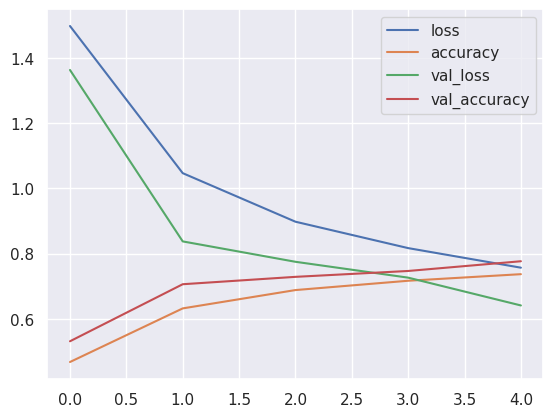

In [15]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

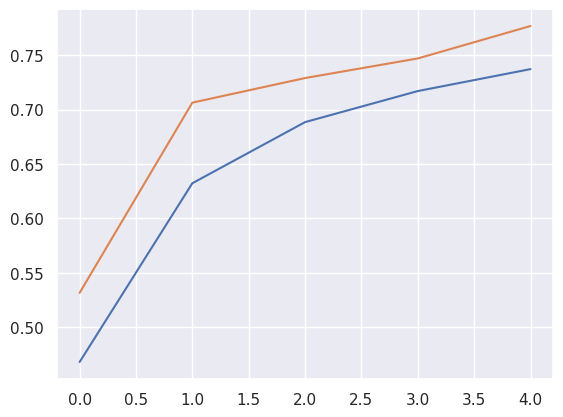

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

In [17]:
model.save('CNN_cifar10.h5')

model2 = load_model('CNN_cifar10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [19]:
np.argmax(model2.predict(x_test[0:10])[0])

1/1 [==============================] - 0s 495ms/step


3

In [20]:
labels[3]

'cat'

In [21]:
predictions = model.predict(x_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis = 1)
print(predictions)

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[3 8 8 ... 5 1 7]


In [22]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

313/313 [==============================] - 1s 2ms/step


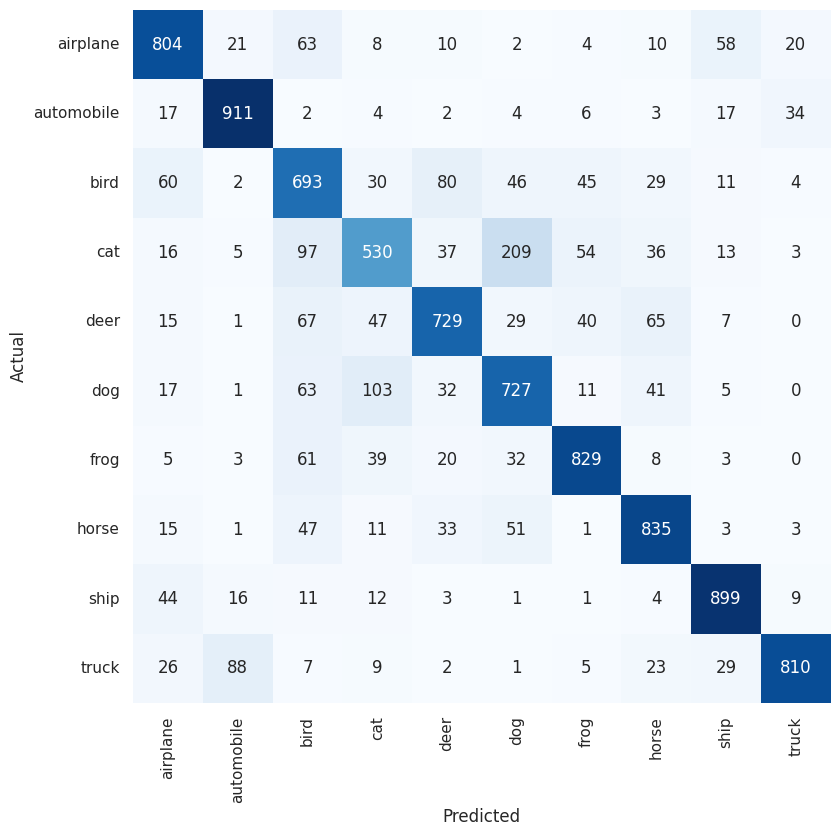

In [24]:
# Predicting test data
predictions = model.predict(x_test)

predictions = np.argmax(predictions, axis = 1)

y_test = np.argmax(y_test, axis = 1)


# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

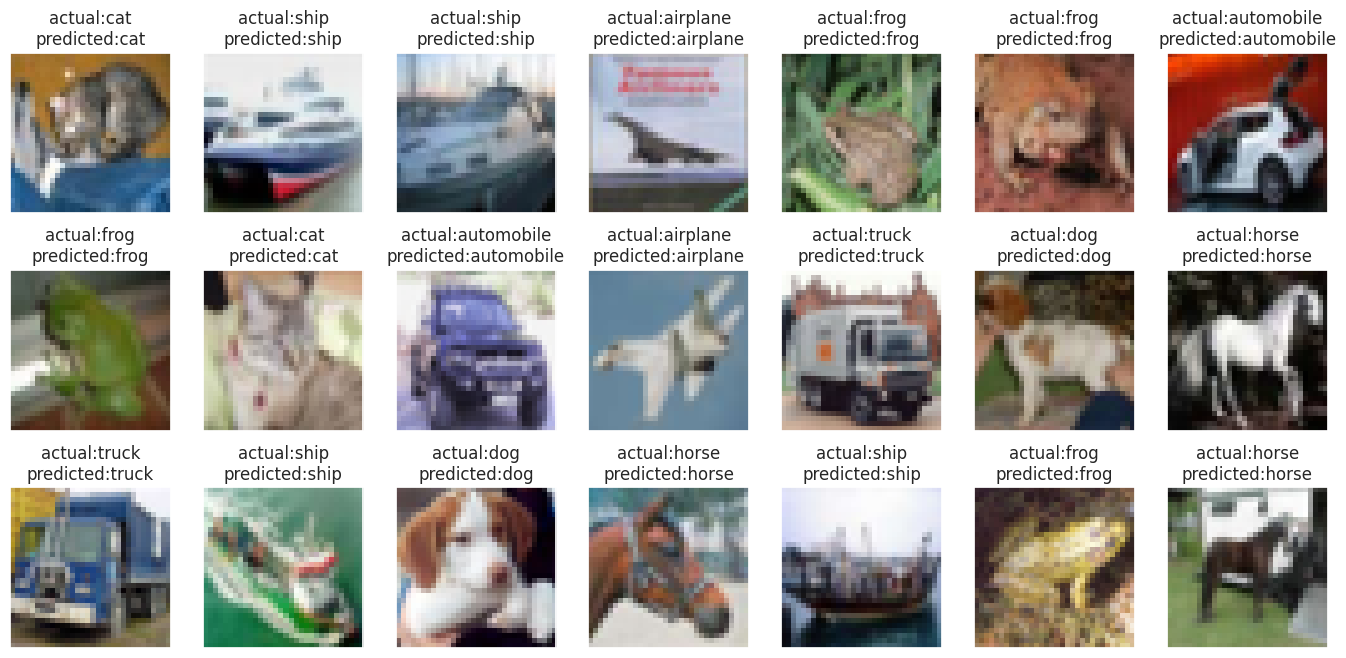

In [26]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()